In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set()
pd.set_option('max.columns', 275, 'max.rows', 275)
%cd ..

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis


In [3]:
y = pd.read_csv('data/processed/3.0 Processed Data with Dummy Variables.csv', index_col = 'Unnamed: 0')
y = y['Satisfaction_Score']

In [4]:
x = pd.read_csv('data/processed/3.1 Scaled Independent Variables.csv', index_col = 'Unnamed: 0')
x.head()

,Age,Education_Completed,Household_Size,No_One,Spouse,Children,Grand_Children,Parent,Grandparent,Brother/Sister,Other_Relative,Friends,Other,Full_Time_Employment,Part_Time_Employment,Self_Employed_Full_Time,Self_Employed_Part_Time,Student,Homemaker,Disabled,Unemployed,Retired,Other_Employement,Income,Achieving_Ends_Meet,US_Born,Duration_of_Residency,Primary_Language,English_Speaking,English_Difficulties,Familiarity_with_America,Familiarity_with_Ethnic_Origin,Identify_Ethnically,Belonging,Discrimination,Present_Health,Present_Mental_Health,Present_Oral_Health,Hygiene_Assistance,Smoking,Drinking,Regular_Exercise,Healthy_Diet,Hypertension,Diabetes,Arthritis,Physical_Check-up,Dentist_Check-up,Urgentcare,Folkmedicine,Primary_Care,Health_Insurance,Dental_Insurance,Unmet_Health_Need,Unmet_Dental_Needs,Transportation_(Medical),Interpretation_(Medical),Communication_Problem,Counseling_Ethnic_Preference,Users,Satisfaction,Family,Close_Friend,Acquaintances,Heal_Professionals,Mobile_Apps,Email,Social_Networks,Online_Communities,Health_Website,Other.1,Psychiatrist,General_Practitioner,Therapist/Counselor,Religious_Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Medical_Ethnic_Preference,Knowledge,Diagnosed,Concern_for_Self_(AD),Concern_for_Others_(AD),Prevention,Plan_(AD),Education_(AD),Services_(AD),Language_Barrier_(AD),Fate_(AD),Aging_(AD),Embarrassing_(AD),Avoidance_(AD),Cure_(AD),Nursing_Home_(AD),Advanced_Directives,Have_an_Advanced_Directive,Superstition,See_Family,Close_Family,Helpful_Family,See_Friends,Close_Friends,Helpful_Friends,Family_Respect,Similar_Values,Successful_Family,Trust,Loyalty,Family_Pride,Expression,Spend_Time_Together,Feel_Close,Togetherness,Religious_Importance,Close-knit_Community,Helpful_Community,Community_Shares_Values,Get_Along,Community_Trust,Residency,Place_to_Live,Raising_Children,Place_to_Work,Small_Businesses,Place_to_Retire,Arts_and_Culture,Safety,Traffic,Austin_Quality_of_Life,Quality_of_Service,Parks_and_Recs,Libraries,Public_Safety,Airport,Austin_Energy,Court,Social_Services,Aware_of_AARC,Visit_Frequency,Activities,EMS_Classes,Fire_Alarm,Public_Computer,Library_Internet_Acess,Literature,Citizenship_Class,Small_Business,English_Classes,9-1-1,3-1-1,APD_Languages,District,Satisfaction_With_Housing.,Nursing_Home,Smoke_Detector,Recycle,Compost,Public_Transportation,Bicycling,Carpooling,Personal_Car,Car_Share,Walking,Other_Transportation,Access_to_a_Computer,Mobile_Devices,Home_Phone,Public_Meeting,Council_Meeting,Contact_City_Official,City_Election,Focus_Group,City_Effort_Satisfaction,Paper_(City-based),TV/Radio_(City-based),Website_(City-based),Social_Networks_(City-based),People_(City-based),Other_(City-based),Paper_(Non-city-based_Ethnic),TV/Radio_(Non-city-based_Ethnic),Website_(Non-city-based_Ethnic),Social_Networks_(Non-city-based_Ethnic),People_(Non-city-based_Ethnic),Other_(Non-city-based_Ethnic),Paper_(Non-city-based_General),TV/Radio_(Non-city-based_General),Website_(Non-city-based_General),Social_Networks_(Non-city-based_General),People_(Non-city-based_General),Other_(Non-city-based_General),Gender_Female,Gender_Male,Ethnicity_Asian Indian,Ethnicity_Chinese,Ethnicity_Filipino,Ethnicity_Korean,Ethnicity_Other,Ethnicity_Vietnamese,Marital_Status_Living with a partner,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Religion_Buddhist,Religion_Catholic,Religion_Hindu,Religion_Muslim,Religion_None,Religion_Other,Religion_Protestant,Occupation_0,Occupation_Business owner,"Occupation_Clerical, office, sales","Occupation_Manager, executive, or official",Occupation_Other,Occupation_Professional,Occupation_Semi-skilled,Occupation_Service worker,Occupation_Skilled trades,Language_Chinese Simplified,Language_Chinese Traditional,Language_Eng_Chinese only,Language_English,Language_Gujarati,Language_Hindi,Language_Korean,Language_Tagalog,Language_Viet,Housing_5,Housing_6,Housing_Apartment/ Townhouse/ Condominium,Housing_Mobile house,Housi

In [7]:
x_cols = pd.read_csv('data/processed/3.2 Correlation Coefficients with Satisfaction_Score.csv', index_col = 'Unnamed: 0')
features = list(x_cols.index.values)
features = features[1:]
x = x[features]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)
for i in [x_train, x_test, y_train, y_test]:
    print (i.shape)

(1956, 247)
(653, 247)
(1956,)
(653,)


In [16]:
regression_features = []
added_feature = []
no_features = []
r2_scores = []
adj_r2_scores =[]
for feature in features:
    regression_features.append(feature)
    X = sm.add_constant(x_train[regression_features]) 
    est = sm.OLS(y_train, X).fit()
    added_feature.append(feature)
    no_features.append(len(regression_features))
    r2_scores.append(est.rsquared)
    adj_r2_scores.append(est.rsquared_adj)
r2_df = pd.DataFrame(
    list(zip(added_feature,no_features,r2_scores,adj_r2_scores)), 
    columns = ['Added Feature','No. of Features','R2 Score','Adjusted R2 score'])
r2_df

C:\Users\SiddharthaMisra\Anaconda3\envs\capstone2\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\SiddharthaMisra\Anaconda3\envs\capstone2\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\SiddharthaMisra\Anaconda3\envs\capstone2\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\SiddharthaMisra\Anaconda3\envs\capstone2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,Added Feature,No. of Features,R2 Score,Adjusted R2 score,P-values
0,Present_Mental_Health,1,0.147517,0.147080,const 0.000000e+00 Present_...
1,Present_Health,2,0.157400,0.156537,const 0.000000e+00 Present_...
2,Satisfaction_With_Housing.,3,0.217485,0.216282,const 0.000000e+00 Pre...
3,Present_Oral_Health,4,0.226903,0.225318,const 0.000000e+00 Pre...
4,English_Speaking,5,0.245104,0.243169,const 0.000000e+00 Pre...
5,Place_to_Live,6,0.255349,0.253056,const 0.000000e+00 Pre...
6,Place_to_Work,7,0.256007,0.253334,const 0.000000e+00 Pre...
7,Familiarity_with_America,8,0.258060,0.255012,const 0.000000e+00 Pre...
8,Income,9,0.269379,0.266000,const 0.000000e+00 Pre...
9,Austin_Quality_of_Life,10,0.272077,0.268334,const 0.000000e+00 Pre...


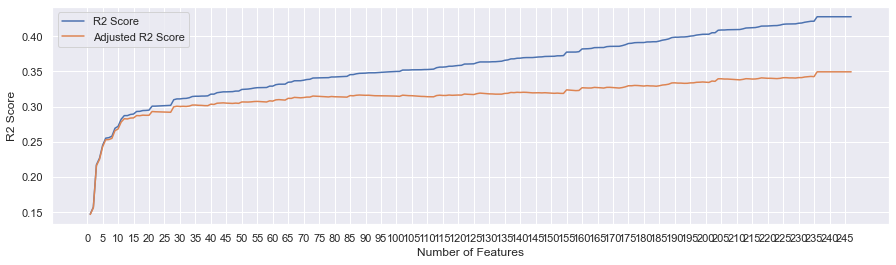

In [26]:
fig, ax = plt.subplots(figsize=(15,4))
sns.lineplot(x='No. of Features', y='R2 Score', data=r2_df, label = 'R2 Score')
sns.lineplot(x='No. of Features', y='Adjusted R2 score', data=r2_df, label = 'Adjusted R2 Score')
plt.xlabel('Number of Features')
plt.ylabel('R2 Score')
ax.xaxis.set_ticks(np.arange(0, 250, 5))
plt.legend(loc='best')
plt.show()